## Wordle champion

We have two Wordle players, with results shown below.

Which player has a better record? Who is a better player?

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [2]:
Wordle = pd.DataFrame(
    {'n': [1, 2, 3, 4, 5, 6],
     'A': [1, 35, 181, 342, 210, 80],
     'B': [0, 8, 71, 389, 111, 72]})

In [3]:
Wordle

,n,A,B
0,1,1,0
1,2,35,8
2,3,181,71
3,4,342,389
4,5,210,111
5,6,80,72


In [4]:
# Create the vectors A and B
A = np.repeat(Wordle['n'], Wordle['A'])
B = np.repeat(Wordle['n'], Wordle['B'])
print(A.shape[0], B.shape[0])

849 651


In [5]:
print("The mean of A, B = {:.3f}".format(A.mean()), ", {:.3f}".format(B.mean()))
print("The median of A, B = {:.3f}".format(A.median()), ", {:.3f}".format(B.median()))
print("The s.d. of A, B = {:.3f}".format(A.std()), ", {:.3f}".format(B.std()))

The mean of A, B = 4.137 , 4.258
The median of A, B = 4.000 , 4.000
The s.d. of A, B = 0.998 , 0.840


# Some initial ideas

Looking at the mean values and s.d., we can say that Player A has a better average; but Player B has a more consistent performance, based on their lower s.d.

One missing piece of information is how many times these players have each failed (not able to solve in 6 attempts) or may have abandoned the game after a few tries.

Another missing piece of information is the time relationship between scores marked by A versus thopse marked by B.

Let's also plot some distributions.

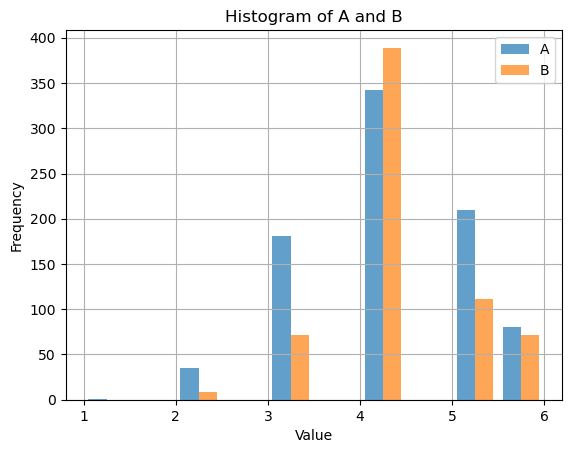

In [6]:
plt.hist([A, B], bins=10, label=['A', 'B'], alpha=0.7)
plt.legend()
plt.title('Histogram of A and B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

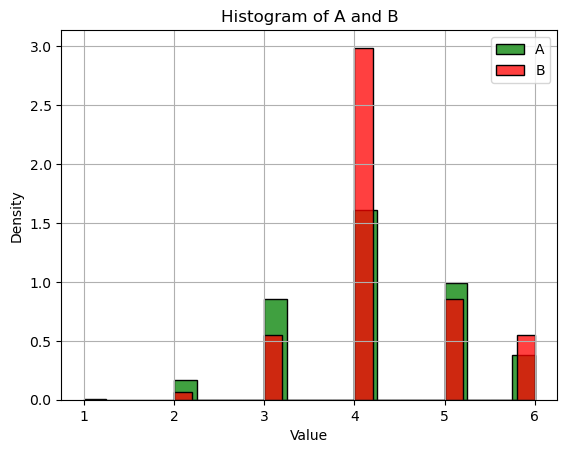

In [7]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the histogram for A
sns.histplot(A, bins=20, kde=False, stat='density', color='green', label='A', ax=ax)

# Plot the histogram for B
sns.histplot(B, bins=20, kde=False, stat='density', color='red', label='B', ax=ax)

plt.title('Histogram of A and B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

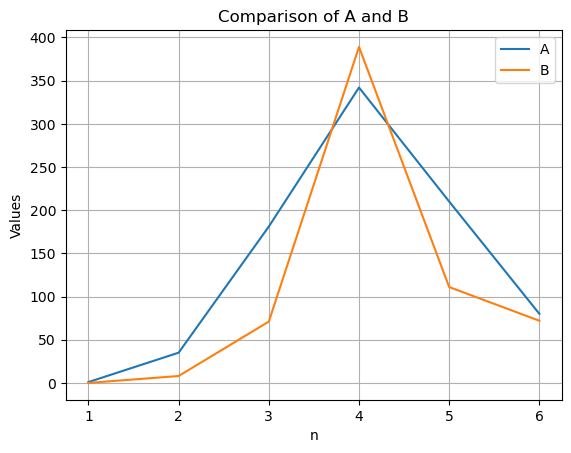

In [8]:
# Plot the data
plt.plot(Wordle['n'], Wordle['A'], label='A')
plt.plot(Wordle['n'], Wordle['B'], label='B')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Values')
plt.title('Comparison of A and B')

# Add legend
plt.legend()
plt.grid()

plt.show()

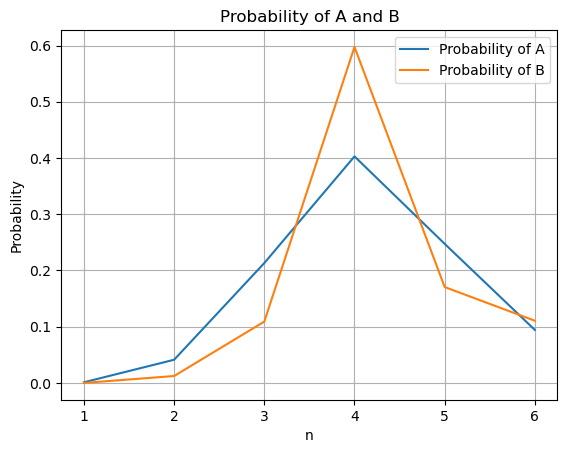

In [9]:
# Calculate probabilities
Wordle['prob_A'] = Wordle['A'] / Wordle['A'].sum()
Wordle['prob_B'] = Wordle['B'] / Wordle['B'].sum()

# Plot the probabilities
plt.plot(Wordle['n'], Wordle['prob_A'], label='Probability of A')
plt.plot(Wordle['n'], Wordle['prob_B'], label='Probability of B')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability of A and B')

# Add legend
plt.legend()
plt.grid()

plt.show()

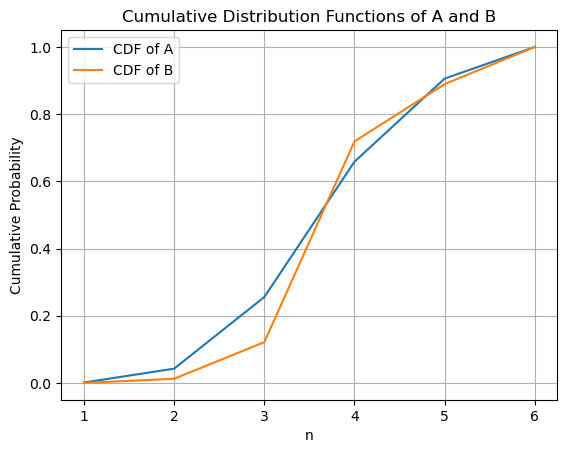

In [10]:
# Calculate the cumulative probabilities
Wordle['cum_prob_A'] = Wordle['A'].cumsum() / Wordle['A'].sum()
Wordle['cum_prob_B'] = Wordle['B'].cumsum() / Wordle['B'].sum()

# Plot the CDFs
plt.plot(Wordle['n'], Wordle['cum_prob_A'], label='CDF of A')
plt.plot(Wordle['n'], Wordle['cum_prob_B'], label='CDF of B')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Functions of A and B')

# Add legend
plt.legend()
plt.grid()

plt.show()

In [11]:
from scipy.stats import ks_2samp

# Calculate the KS statistic
ks_statistic, p_value = ks_2samp(A, B)

print("KS statistic:", ks_statistic)
print("p-value:", p_value)

KS statistic: 0.13424305091921643
p-value: 2.945794516617005e-06


In [12]:
Wordle.cum_prob_A - Wordle.cum_prob_B

0    0.001178
1    0.030114
2    0.134243
3   -0.060472
4    0.016371
5    0.000000
dtype: float64

# Correlation on time

Let's add the time to the problem.

Here, we <b>randomly</b> assign the two vectors to different timestamps; note that as these assignments are random, we expect not finding any insight.

In [45]:
T = max(A.shape[0], B.shape[0])
Timed = pd.DataFrame(
    {'t': range(0, T),
     'A': [0] * (T),
     'B': [0] * (T)})

In [46]:
Timed.A[:len(A)] = A 
random.shuffle(Timed.A)
Timed.B[:len(B)] = B
random.shuffle(Timed.B)

In [47]:
cross_table = pd.crosstab(Timed['A'], Timed['B'])
print(cross_table)

B   0  2   3    4   5   6
A                        
1   1  0   0    0   0   0
2   7  1   5   16   2   4
3  48  1  18   86  16  12
4  66  5  24  162  54  31
5  55  1  18   93  26  17
6  21  0   6   32  13   8


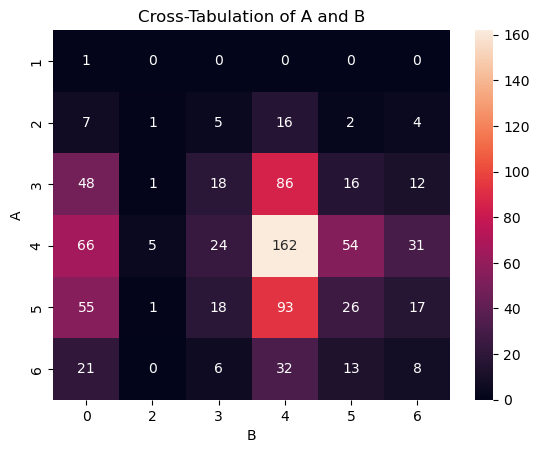

In [48]:
sns.heatmap(cross_table, annot=True, fmt='d')
plt.title('Cross-Tabulation of A and B')
plt.xlabel('B')
plt.ylabel('A')
plt.show()

# Tests and p-values

## E1

First we try the time sequences as they appear. We compare the distribution of $P(A|B=0)$ and $P(A|B<>0)$.

In [49]:
Timed['A2'] = Timed.A.copy()
Timed['B2'] = Timed.B.copy()

In [50]:
A_B_0 = Timed.A2[(Timed.B2==0) & (Timed.A2!=0)]
A_B_X = Timed.A2[(Timed.B2!=0) & (Timed.A2!=0)]

In [51]:
t_statistic, p_value = stats.ttest_ind(A_B_0, A_B_X)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.402203198877183
p-value: 0.6876359636043514


Large p-value means that this can be happening by chance and we do not have enough evidence to reject the null hypothesis. Another way of saying that the two samples might be from the same distribution.

## E2

In the next experiment, we make a change in the data and randomly half the times where A has a score of 6 (played bad), we make B to abandon the game. 

In [52]:
Timed['A2'] = Timed.A.copy()
Timed['B2'] = Timed.B.copy()
Timed.B2[(Timed.A == 6) & (np.random.rand(Timed.shape[0])<0.5)] = 0 # This is the instruction to B abondon the game, if A has done poorly, with a probability of 50%

In [53]:
A_B_0 = Timed.A2[(Timed.B2==0) & (Timed.A2!=0)]
A_B_X = Timed.A2[(Timed.B2!=0) & (Timed.A2!=0)]

In [54]:
t_statistic, p_value = stats.ttest_ind(A_B_0, A_B_X)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 4.63944493690137
p-value: 4.045888313756218e-06


Small p-value this time indicates that the difference can't be explained by chance; in other words, the two samples are likely to be drawn from different distributions.

## E3

Now we do another experiment: We compare the distribution of $P(B|A-is-high)$ and $P(B|A-is-low)$.

In [55]:
Timed['A2'] = Timed.A.copy()
Timed['B2'] = Timed.B.copy()

In [56]:
# compare B|A is High and B|A is Low

B_A_H = Timed.B2[(Timed.A2>4) & (Timed.A2!=0)]
B_A_L = Timed.B2[(Timed.A2<=4) & (Timed.A2!=0)]

In [57]:
t_statistic, p_value = stats.ttest_ind(B_A_L, B_A_H)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 1.0359181488404916
p-value: 0.30053598838385454


Again, with a large p-value we can say that this can be happening by chance and we do not have enough evidence to reject the null hypothesis. Another way of saying that the two samples might be from the same distribution.

## E4

Finally, we make one more change in the data, same as we did last time, randomly half the times where A has a score of 6 (played bad), we make B to abandon the game.

In [58]:
Timed['A2'] = Timed.A.copy()
Timed['B2'] = Timed.B.copy()
Timed.B2[(Timed.A == 6) & (np.random.rand(Timed.shape[0])<0.5)] = 0 # This is the instruction to B abondon the game, if A has done poorly, with a probability of 50%

In [59]:
# compare B|A is High and B|A is Low

B_A_H = Timed.B2[(Timed.A2>4) & (Timed.A2!=0)]
B_A_L = Timed.B2[(Timed.A2<=4) & (Timed.A2!=0)]

In [60]:
t_statistic, p_value = stats.ttest_ind(B_A_L, B_A_H)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 4.219808500400994
p-value: 2.70901400422288e-05


And one more time we see that small p-value suggests that now the two samples are likely to be from different distributions.

### Bootstrap method

In [ ]:
N = 10000
A_sample = np.random.choice(Wordle.n, size=N, p=Wordle.prob_A, replace=True)
B_sample = np.random.choice(Wordle.n, size=N, p=Wordle.prob_B, replace=True)

A_wins_bs = (A_sample < B_sample).sum()/N
B_wins_bs = (A_sample < B_sample).sum()/N
tied_bs = (A_sample == B_sample).sum()/N